<a href="https://colab.research.google.com/github/d-tomas/workshops/blob/main/20210217/notebooks/aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje automático

En este *notebook* vamos a desarrollar un sistema para análisis de sentimientos (clasificación) y otro para predecir el precio de una casa (regresión).

## Pasos previos

In [96]:
# Librerías

import numpy as np  # Obtener valores únicos en un vector
import pandas as pd
from sklearn.metrics import accuracy_score  # Calcular la precisión del clasificador
from sklearn.model_selection import train_test_split  # Separar el dataset en entrenamiento y test
from sklearn.metrics import confusion_matrix  # Sacar la matriz de confusión
from sklearn.metrics import mean_absolute_error  # Mean Absolut Error (MAE) para regresión
from sklearn.svm import SVC  # Algoritmo Support Vector Machines
from sklearn.feature_extraction.text import TfidfVectorizer  # Matriz de términos por documento con TF-IDF
from xgboost import XGBRegressor  # Algoritmo de regresión
import seaborn as sns  # Visualización del mapa de calor

# Descargamos el corpus para entrenar y evaluar el sistema de clasificación
!wget https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/cell_phones.csv
# Descargamos el corpus para entrenar y evaluar el sistema de regresión
!wget https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/houses.csv

--2021-02-13 13:37:36--  https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/cell_phones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62223 (61K) [text/plain]
Saving to: ‘cell_phones.csv.4’

cell_phones.csv.4   100%[===================>]  60.76K  --.-KB/s    in 0.01s   

2021-02-13 13:37:36 (5.51 MB/s) - ‘cell_phones.csv.4’ saved [62223/62223]

--2021-02-13 13:37:36--  https://raw.githubusercontent.com/d-tomas/workshops/main/20210217/datasets/houses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

## Clasificación

Vamos a contruir un sistema de **análisis de sentimientos**. Vamos a entrenar el sistema con un corpus (conjunto de datos) que consta de 1000 opiniones sobre teléfonos móbiles en inglés, 500 positivas (etiquetadas como `POS`) y 500 negativas (etiquetadas como `NEG`).



In [3]:
# Vemos que pinta tiene el corpus de entrenamiento

!head cell_phones.csv

content,opinion
"So there is no way for me to plug it in here in the US unless I go by a converter.",NEG
"Good case, Excellent value.",POS
"Great for the jawbone.",POS
"Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!",NEG
"The mic is great.",POS
"I have to jiggle the plug to get it to line up right to get decent volume.",NEG
"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",NEG
"If you are Razr owner...you must have this!",POS
"Needless to say, I wasted my money.",NEG


Precisión: 83.50%

Matriz de confusión:


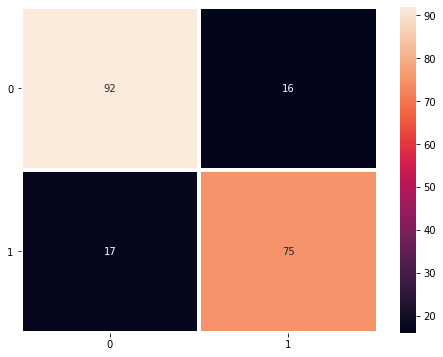

In [97]:
# Crear el clasificador para el análisis de sentimientos

data_classification = pd.read_csv('cell_phones.csv')  # Cargamos los datos del fichero
corpus = data_classification['content'].values  # Guardamos los mensajes
y = data_classification['opinion'].values  # Guardamos las opiniones

# Tenemos que transformar las palabras en números
# Cada palabra del mensaje se representa por su TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Separamos el corpus en entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Usamos SVM como algoritmo para la clasificaión
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)  # Entrenamos el modelo

# Hacemos la predicción sobre todo el conjunto de test
predictions = model.predict(X_test)

# Calculamos la precisión del algoritmo
print('Precisión: {:.2%}\n'.format(accuracy_score(predictions, y_test)))
print('Matriz de confusión:')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, linewidth=3)
plt.yticks(rotation=0)
plt.show()


In [98]:
# Si queremos probar el modelo con una nueva entrada

new_input = ['I love this phone!!']
# Tenemos que transformar el texto a números, como se hizo al entrenar
new_input = vectorizer.transform(new_input)
model.predict(new_input)  # Predecimos la etiqueta para la nueva entrada (POS o NEG)

array(['POS'], dtype=object)

## Regresión

In [101]:
data_regression = pd.read_csv('houses.csv')
data_regression

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [102]:
data_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
y = data_regression['SalePrice']  # Objetivo a predecir (el precio de las casas)
X = data_regression.drop(labels='SalePrice', axis=1)  # Todas las características de cada casa (menos su precio)

# Las variables categoriales (las que no contienen números) deben convertirse a números
# Usamos la técnica 'one-hot-encoding'
X = pd.get_dummies(X)

# Creamos los conjuntos de entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Creamos el modelo pasándole algunos parámetros para ajustarlo y mejorar el rendimiento
model = XGBRegressor(colsample_bytree=0.6, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=3000, subsample=0.75, random_state=1)
model.fit(X_train, y_train)  # Entrenamos el modelo

# Hacemos la predicción sobre el conjunto de test
predictions = model.predict(X_test)

# Calculamos la precisión del algoritmo (MAE)
# Cuanto más pequeño sea este valor mejor
print("MAE: {:,.0f}".format(mean_absolute_error(predictions, y_test)))

[13:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 14,076
